# Calibration Simulation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from plotly import express as px
import plotly.io as pio
# pio.kaleido.scope.mathjax = None  # https://github.com/plotly/plotly.py/issues/3469
from tqdm.auto import tqdm
from calibration import HistogramCalibrator, ScalingBinningCalibrator, OracleCalibrator, BinnedOracleCalibrator, PlattCalibrator, IsotonicCalibrator
from simulation_data import GaussianMixtureData, BetaCalibrationData, GaussianMixtureData2
from simulation_calibration import CalibrationSimulation
%load_ext autoreload
%autoreload 2

/opt/anaconda/anaconda3/envs/py12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/zeyusun/calibration_private/simulation_calibration.py:139: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(_B_list, subdf['sha'], 'o-', c='C0', label='$R^{\mathrm{sha}}$')
/home/zeyusun/calibration_private/simulation_calibration.py:258: SyntaxWarning: invalid escape sequence '\R'
  columns = {'cal': '$\REL$', 'sha': '$\GRP$', 'risk': '$R$', 'bs': 'MSE'}
/home/zeyusun/calibration_private/simulation_calibration.py:258: SyntaxWarning: invalid escape sequence '\G'
  columns = {'cal': '$\REL$', 'sha': '$\GRP$', 'risk': '$R$', 'bs': 'MSE'}
/home/zeyusun/calibration_private/simulation_calibration.py:333: SyntaxWarning: invalid escape sequence '\R'
  columns = {'cal': '$\REL$', 'sha': '$\GRP$', 'risk': '$R$', 'bs': 'M

## Appendix E.1. Verifying risk bounds of UMB

In [2]:
data = GaussianMixtureData()
sim = CalibrationSimulation(data)
df = sim.run_umb()

Running UMB with 
 n_list=[   1000    3162   10000   31622  100000  316227 1000000], 
 B_list=[  31   50   79  125  199  316  501  794 1258 1995 3162], 
 i_list=[0 1 2 3 4]
Totol number of runs: 385


/home/zeyusun/calibration_private/simulation_calibration.py:139: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(_B_list, subdf['sha'], 'o-', c='C0', label='$R^{\mathrm{sha}}$')
/home/zeyusun/calibration_private/simulation_calibration.py:258: SyntaxWarning: invalid escape sequence '\R'
  columns = {'cal': '$\REL$', 'sha': '$\GRP$', 'risk': '$R$', 'bs': 'MSE'}
/home/zeyusun/calibration_private/simulation_calibration.py:258: SyntaxWarning: invalid escape sequence '\G'
  columns = {'cal': '$\REL$', 'sha': '$\GRP$', 'risk': '$R$', 'bs': 'MSE'}
/home/zeyusun/calibration_private/simulation_calibration.py:333: SyntaxWarning: invalid escape sequence '\R'
  columns = {'cal': '$\REL$', 'sha': '$\GRP$', 'risk': '$R$', 'bs': 'MSE'}
/home/zeyusun/calibration_private/simulation_calibration.py:333: SyntaxWarning: invalid escape sequence '\G'
  columns = {'cal': '$\REL$', 'sha': '$\GRP$', 'risk': '$R$', 'bs': 'MSE'}


KeyboardInterrupt: 

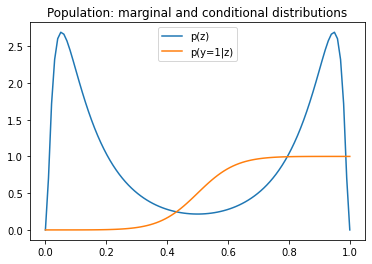

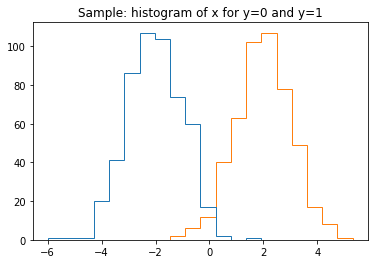

In [ ]:
zz = np.linspace(0, 1, 100)
plt.plot(zz, sim.data.pz(zz), label='p(z)')
plt.plot(zz, sim.data.py_given_z(zz), label='p(y=1|z)')
plt.legend()
plt.title('Population: marginal and conditional distributions')
plt.show()

z, y = sim.data.sample(1000)
x = sim.data.f_inv(z)
plt.hist([x[y==0], x[y==1]], histtype='step', stacked=False, bins=20)
plt.title('Sample: histogram of x for y=0 and y=1')
plt.show()

In [ ]:
df

cal           sha       ref      risk        bs         n     B  i
0    0.000037  6.333819e-03  0.017149  0.006370  0.023520      1000     6  0
1    0.000153  4.092107e-03  0.017149  0.004245  0.021394      1000     6  1
2    0.000084  1.418198e-02  0.017149  0.014266  0.031415      1000     6  2
3    0.000085  4.906730e-03  0.017149  0.004991  0.022141      1000     6  3
4    0.000437  1.698114e-02  0.017149  0.017418  0.034567      1000     6  4
..        ...           ...       ...       ...       ...       ...   ... ..
495  0.000001  9.516113e-07  0.017149  0.000002  0.017152  10000000  1000  5
496  0.000002  1.055883e-06  0.017149  0.000003  0.017152  10000000  1000  6
497  0.000001  9.338333e-07  0.017149  0.000002  0.017152  10000000  1000  7
498  0.000001  9.895469e-07  0.017149  0.000002  0.017152  10000000  1000  8
499  0.000002  8.869299e-07  0.017149  0.000003  0.017153  10000000  1000  9

[500 rows x 8 columns]

cal vs. B 1.0468917860804972
cal vs. n -0.8792874182843687
sha vs. B -1.9298083698948754


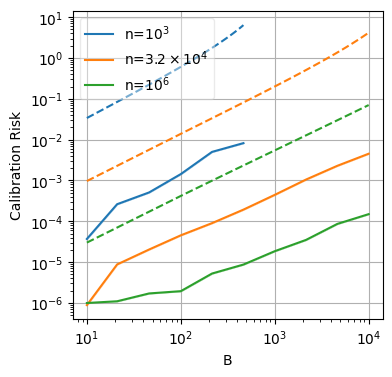

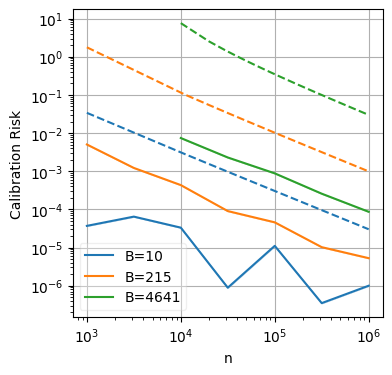

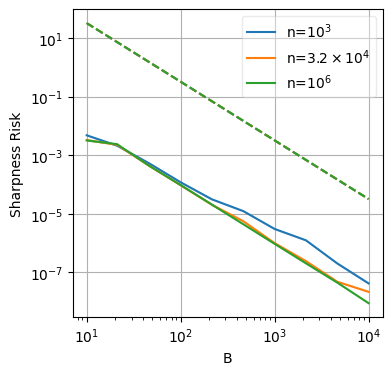

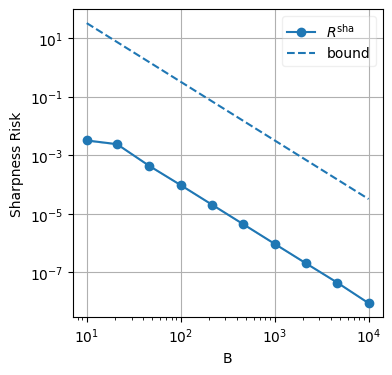

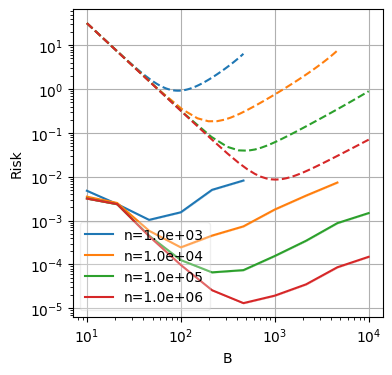

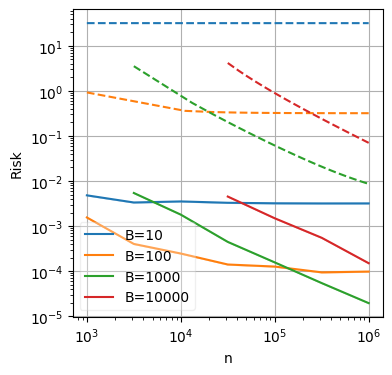

<Figure size 400x400 with 0 Axes>

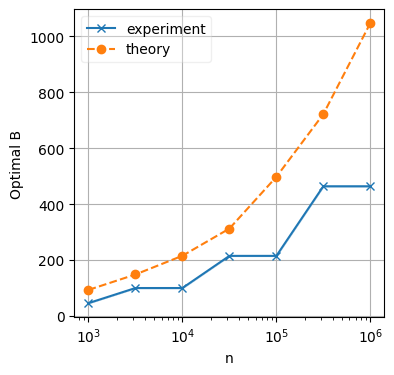

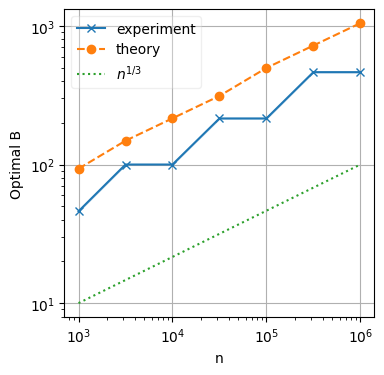

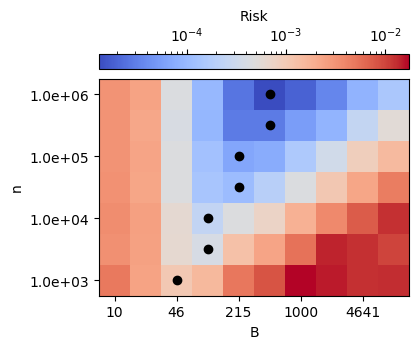

In [ ]:
sim.plot_umb(df, folder='UMB_1')

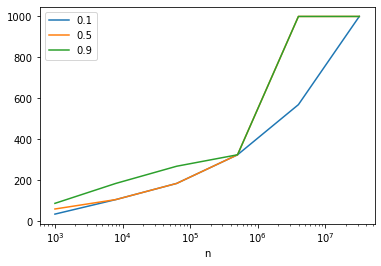

In [ ]:
df.loc[df.groupby(['n', 'i'])['risk'].idxmin()].groupby(['n'])['B'].quantile([0.1, 0.5, 0.9]).unstack().plot()
plt.xscale('log')


## Appendix E.2. Compare with other recalibration methods
Methods: Platt Scaling, Scaling-binning (Kumar'19), UWB, and UMB

### Simulation 1: Mixture of Gaussians (ommited in the paper)
$$
    \begin{aligned}
    Y &\sim \text{Bernoulli}(0.5), \\
    X \mid Y=0 &\sim \mathcal{N}(-2, 1), \\
    X \mid Y=1 &\sim \mathcal{N}(2, 1), \\
    Z &= \text{sigmoid}(X).
    \end{aligned}
$$


In [ ]:
n = 5000
sim = CalibrationSimulation(data=GaussianMixtureData())
df = sim.run_calibrators(n_list=[n], B_list=np.logspace(1, 3.3, 7, dtype=int), i_list=np.arange(1))
df

Calibrator Metric         Value     n     B  i
0      Optimal    cal  0.000000e+00  5000    10  0
1      Optimal    sha  0.000000e+00  5000    10  0
2      Optimal    ref  1.714935e-02  5000    10  0
3      Optimal   risk  0.000000e+00  5000    10  0
4      Optimal     bs  1.714935e-02  5000    10  0
..         ...    ...           ...   ...   ... ..
170        UMB    cal  4.896681e-03  5000  1995  0
171        UMB    sha  4.949775e-07  5000  1995  0
172        UMB    ref  1.714935e-02  5000  1995  0
173        UMB   risk  4.897176e-03  5000  1995  0
174        UMB     bs  2.204653e-02  5000  1995  0

[175 rows x 6 columns]

In [ ]:
fig = sim.plot_calibrators(df)
fig

In [ ]:
B = round(n ** (1/3))
print(B)
df_raw = sim.run_calibrators(n_list=[5000], B_list=[B], i_list=np.arange(100))

17


In [ ]:
df_wide, df_str = sim.tabulate_calibrators(df_raw)
print(df_str)
df_wide

\begin{tabular}{ccccc}
\toprule
Metric ($\times 10^{-3}$) & $\REL$ & $\GRP$ & $R$ & MSE \\
\midrule
Platt & \bfseries 0.062 & \bfseries 0.000 & \bfseries 0.062 & \bfseries 17.212 \\
Hybrid & 0.087 & 4.284 & 4.345 & 21.494 \\
UWB & 0.312 & 0.195 & 0.507 & 17.656 \\
UMB & 0.173 & 4.284 & 4.363 & 21.513 \\
\bottomrule
\end{tabular}



Metric ($\times 10^{-3}$)    $\REL$   $\GRP$       $R$        MSE
Platt                      0.062234  0.00000  0.062234  17.211587
Hybrid                     0.086634  4.28411  4.345000  21.494352
UWB                        0.311842  0.19496  0.506802  17.656155
UMB                        0.172857  4.28411  4.363205  21.512557

### Simulation 2: Logistic calibration
$$
    \begin{aligned}
    Z &\sim \text{Uniform}[0,1], \\
    Y \mid Z &\sim \text{Bernoulli}(h_{\text{beta}}(Z; 4, 4, 0)),
    \end{aligned}
$$
where
$$
    h_{\text{beta}}(z; a, b, c) = \frac{1}{1 + 1/\left(e^c \frac{z^a}{(1-z)^b}\right)}.
$$

#### Risk vs. B

In [ ]:
n = 5000
sim = CalibrationSimulation(data=BetaCalibrationData(a=4, b=4, c=0))
df = sim.run_calibrators(n_list=[n], B_list=np.logspace(1, 3.3, 7, dtype=int), i_list=np.arange(1))
df

Calibrator Metric         Value     n     B  i
0      Optimal    cal  0.000000e+00  5000    10  0
1      Optimal    sha  0.000000e+00  5000    10  0
2      Optimal    ref  5.965853e-02  5000    10  0
3      Optimal   risk  0.000000e+00  5000    10  0
4      Optimal     bs  5.965853e-02  5000    10  0
..         ...    ...           ...   ...   ... ..
170        UMB    cal  2.206503e-02  5000  1995  0
171        UMB    sha  1.253362e-07  5000  1995  0
172        UMB    ref  5.965853e-02  5000  1995  0
173        UMB   risk  2.206516e-02  5000  1995  0
174        UMB     bs  8.172369e-02  5000  1995  0

[175 rows x 6 columns]

In [ ]:
fig = sim.plot_calibrators(df)
fig.write_image('compare_B_logistic.pdf')
fig

#### Fix B and run random seeds to get 90-percentile

In [ ]:
n = 5000
B = round(2 * n ** (1/3))  # UMB have optimal B, yet still underperforming than Hybrid
print(B)
df_raw = sim.run_calibrators(n_list=[5000], B_list=[B], i_list=np.arange(100))

34


In [ ]:
df_wide, df_str = sim.tabulate_calibrators(df_raw)
print(df_str)
df_wide

\begin{tabular}{ccccc}
\toprule
Metric ($\times 10^{-3}$) & $\REL$ & $\GRP$ & $R$ & MSE \\
\midrule
Platt & 0.122 & \bfseries 0.000 & \bfseries 0.122 & \bfseries 59.781 \\
Hybrid & \bfseries 0.119 & 0.212 & 0.315 & 59.974 \\
UWB & 0.661 & 0.194 & 0.855 & 60.514 \\
UMB & 0.647 & 0.212 & 0.839 & 60.497 \\
\bottomrule
\end{tabular}



Metric ($\times 10^{-3}$)    $\REL$    $\GRP$       $R$        MSE
Platt                      0.122294  0.000000  0.122294  59.780824
Hybrid                     0.118659  0.212339  0.315471  59.974002
UWB                        0.661395  0.193874  0.855270  60.513800
UMB                        0.646514  0.212339  0.838940  60.497471

#### Fix B and random seed to plot

/x/home/zeyusun/work/wip/simulation_data.py:101: RuntimeWarning:

divide by zero encountered in true_divide



  0%|          | 0/5 [00:00<?, ?it/s]

Metric    $\REL$    $\GRP$       $R$       MSE
Platt   0.000015  0.000000  0.000015  0.059674
Hybrid  0.000014  0.000199  0.000213  0.059872
UWB     0.000499  0.000194  0.000693  0.060351
UMB     0.000546  0.000199  0.000745  0.060404

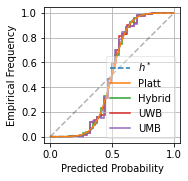

In [ ]:
# B = round(2 * n ** (1/3))  # we might prefer small B for visualization
plt.figure(figsize=(2.5, 2.5))
df_wide, df_str, _ = sim.run_calibrators_single(n=n, B=B, seed=3)
plt.savefig('compare_rd_logistic.pdf', bbox_inches='tight')
df_wide

### Simulation 3: Beta calibration
$$
    \begin{aligned}
    Z &\sim \text{Uniform}[0,1], \\
    Y \mid Z &\sim \text{Bernoulli}(h_{\text{beta}}(Z; 0.1, 4, 0)).
    \end{aligned}
$$

#### Risk vs. B

In [ ]:
sim = CalibrationSimulation(data=BetaCalibrationData(a=0.1, b=4, c=0)) #m=0.25)
n = 5000
df = sim.run_calibrators(n_list=[n], B_list=np.logspace(1, 3.3, 7, dtype=int), i_list=np.arange(1))
df

Calibrator Metric         Value     n     B  i
0      Optimal    cal  0.000000e+00  5000    10  0
1      Optimal    sha  0.000000e+00  5000    10  0
2      Optimal    ref  9.593936e-02  5000    10  0
3      Optimal   risk  0.000000e+00  5000    10  0
4      Optimal     bs  9.593936e-02  5000    10  0
..         ...    ...           ...   ...   ... ..
170        UMB    cal  3.814027e-02  5000  1995  0
171        UMB    sha  2.388373e-07  5000  1995  0
172        UMB    ref  9.593936e-02  5000  1995  0
173        UMB   risk  3.814051e-02  5000  1995  0
174        UMB     bs  1.340799e-01  5000  1995  0

[175 rows x 6 columns]

In [ ]:
fig = sim.plot_calibrators(df)
fig.write_image('compare_B_beta.pdf')
fig

#### Fix B and run random seeds to get 90-percentile

In [ ]:
B = round(n ** (1/3))
print(B)
df_raw = sim.run_calibrators(n_list=[n], B_list=[B], i_list=np.arange(100))

17


In [ ]:
df_wide, df_str = sim.tabulate_calibrators(df_raw)
print(df_str)
df_wide

\begin{tabular}{ccccc}
\toprule
Metric ($\times 10^{-3}$) & $\REL$ & $\GRP$ & $R$ & MSE \\
\midrule
Platt & 3.682 & \bfseries 0.000 & 3.682 & 99.621 \\
Hybrid & 3.117 & 0.251 & 3.360 & 99.299 \\
UWB & 0.572 & 0.238 & 0.810 & 96.749 \\
UMB & \bfseries 0.560 & 0.251 & \bfseries 0.797 & \bfseries 96.736 \\
\bottomrule
\end{tabular}



Metric ($\times 10^{-3}$)    $\REL$    $\GRP$       $R$        MSE
Platt                      3.681965  0.000000  3.681965  99.621327
Hybrid                     3.117253  0.251361  3.359704  99.299065
UWB                        0.572079  0.237797  0.809876  96.749238
UMB                        0.559846  0.251361  0.797110  96.736471

#### Fix B and random seed to plot

/x/home/zeyusun/work/wip/simulation_data.py:101: RuntimeWarning:

divide by zero encountered in true_divide



  0%|          | 0/5 [00:00<?, ?it/s]

\begin{tabular}{ccccc}
\toprule
Metric & $\REL$ & $\GRP$ & $R$ & MSE \\
\midrule
Platt & 0.003409 & \bfseries 0.000000 & 0.003409 & 0.099348 \\
Hybrid & 0.002939 & 0.000234 & 0.003173 & 0.099112 \\
UWB & 0.000155 & 0.000238 & 0.000392 & 0.096332 \\
UMB & \bfseries 0.000134 & 0.000234 & \bfseries 0.000368 & \bfseries 0.096307 \\
\bottomrule
\end{tabular}



Metric    $\REL$    $\GRP$       $R$       MSE
Platt   0.003409  0.000000  0.003409  0.099348
Hybrid  0.002939  0.000234  0.003173  0.099112
UWB     0.000155  0.000238  0.000392  0.096332
UMB     0.000134  0.000234  0.000368  0.096307

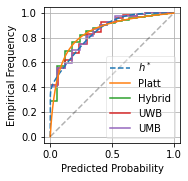

In [ ]:
plt.figure(figsize=(2.5, 2.5))
df_wide, df_str, _ = sim.run_calibrators_single(n=n, B=B, seed=0)
plt.savefig('compare_rd_beta.pdf', bbox_inches='tight')
print(df_str)
df_wide

## Different distributions

## Different classifiers

In [ ]:
sim = CalibrationSimulation(data=GaussianMixtureData())
# sim = CalibrationSimulation(data=GaussianMixtureData2())

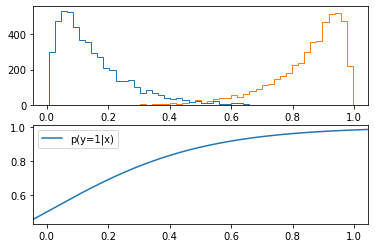

In [ ]:
x, y = sim.data.sample(10000)
xlim = [-10, 7.5]

fig, ax = plt.subplots(2, 1)
ax[0].hist([x[y==0], x[y==1]], histtype='step', stacked=False, bins=50)
xlim = ax[0].get_xlim()

xx = np.linspace(*xlim, 1000)
ax[1].plot(xx, sim.data.py_given_x(xx), label='p(y=1|x)')
ax[1].set_xlim(xlim)
plt.legend()

In [ ]:
df = sim.run_classifiers()

Decision Tree


/home/zeyusun/calibration_private/simulation_calibration.py:68: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_lower = df_raw.groupby(['n', 'B']).quantile(q=delta)
/home/zeyusun/calibration_private/simulation_calibration.py:69: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_upper = df_raw.groupby(['n', 'B']).quantile(q=1-delta)


cal vs. B 1.18100605460161e-01
cal vs. n -1.0946513821638677
sha vs. B -0.13914613450182173
Gradient Boosting
cal vs. B 0.2682338880814663


/home/zeyusun/calibration_private/simulation_calibration.py:68: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_lower = df_raw.groupby(['n', 'B']).quantile(q=delta)
/home/zeyusun/calibration_private/simulation_calibration.py:69: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_upper = df_raw.groupby(['n', 'B']).quantile(q=1-delta)


cal vs. n -1.0253136434612125
sha vs. B -0.8182170003402587
Logistic
cal vs. B 1.0220348646420716


/home/zeyusun/calibration_private/simulation_calibration.py:68: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_lower = df_raw.groupby(['n', 'B']).quantile(q=delta)
/home/zeyusun/calibration_private/simulation_calibration.py:69: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_upper = df_raw.groupby(['n', 'B']).quantile(q=1-delta)
/home/zeyusun/calibration_private/simulation_calibration.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

cal vs. n -0.9535868281522417
sha vs. B -1.8358072658344289
Naive Bayes
cal vs. B 1.0217376315347757


/home/zeyusun/calibration_private/simulation_calibration.py:68: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_lower = df_raw.groupby(['n', 'B']).quantile(q=delta)
/home/zeyusun/calibration_private/simulation_calibration.py:69: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  df_upper = df_raw.groupby(['n', 'B']).quantile(q=1-delta)


cal vs. n -0.9535803752833824
sha vs. B -1.8358072658344289


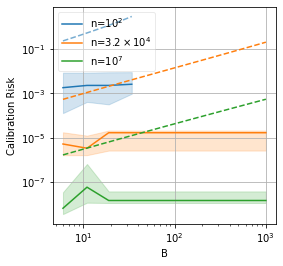

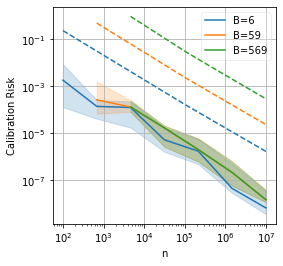

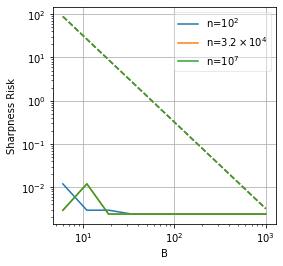

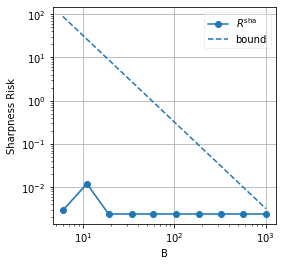

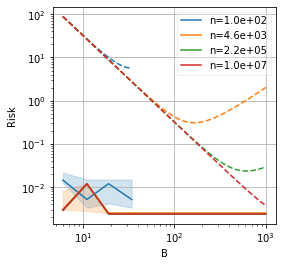

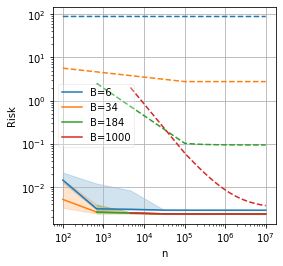

<Figure size 288x288 with 0 Axes>

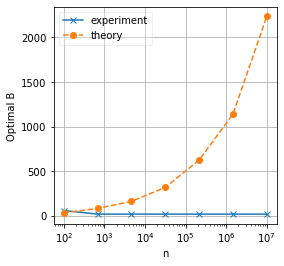

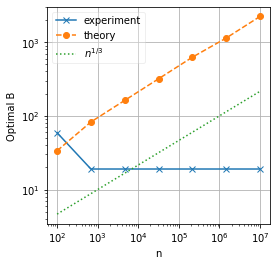

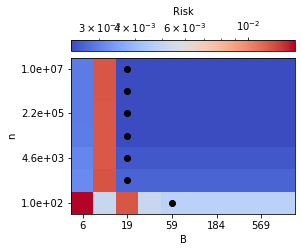

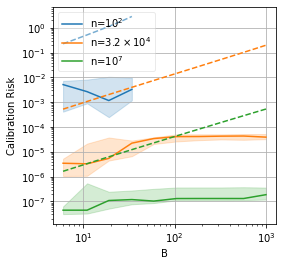

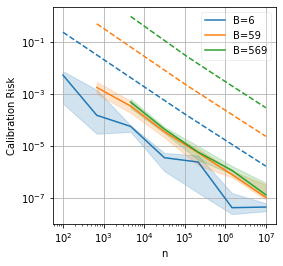

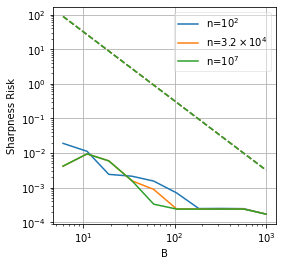

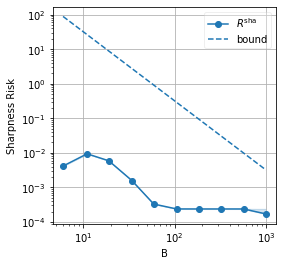

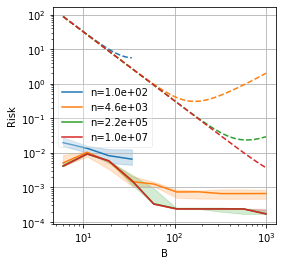

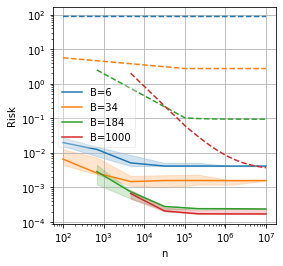

<Figure size 288x288 with 0 Axes>

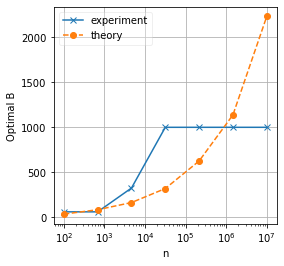

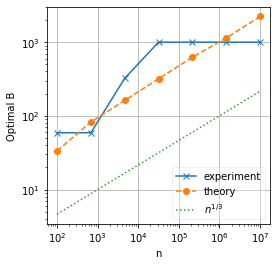

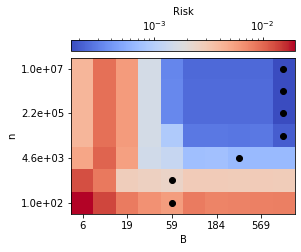

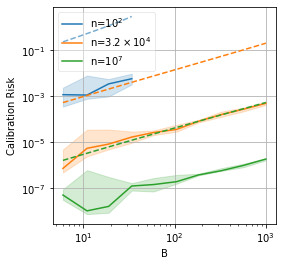

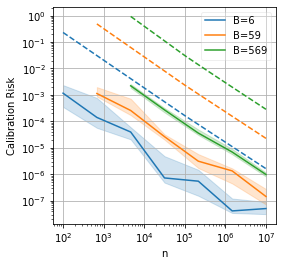

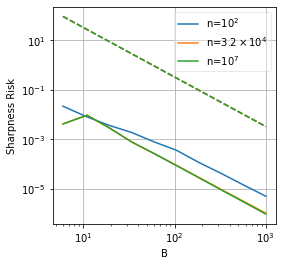

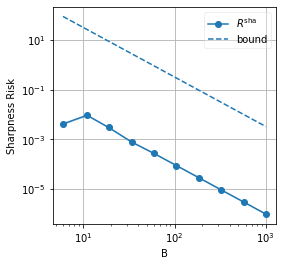

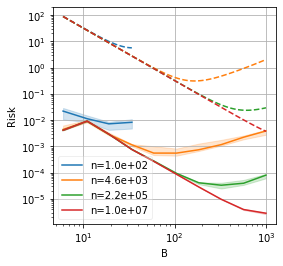

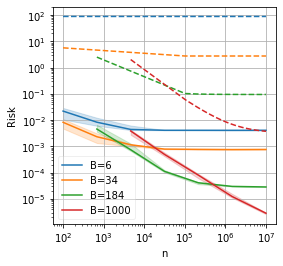

<Figure size 288x288 with 0 Axes>

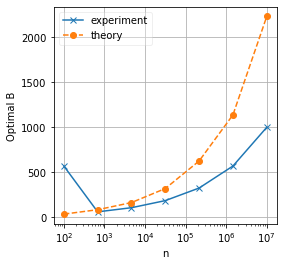

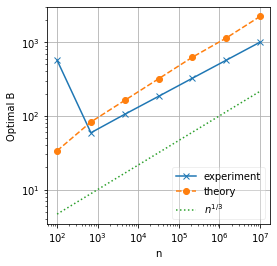

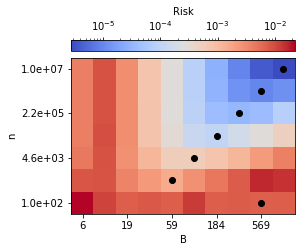

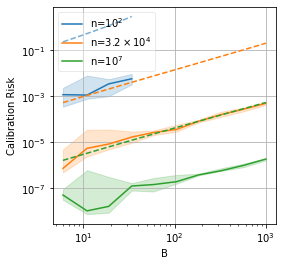

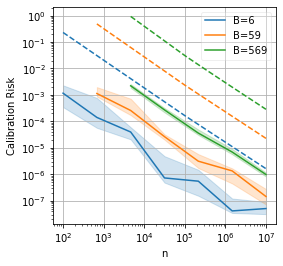

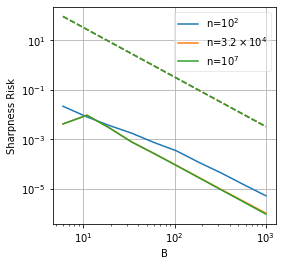

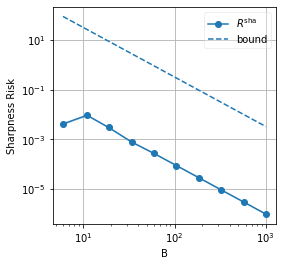

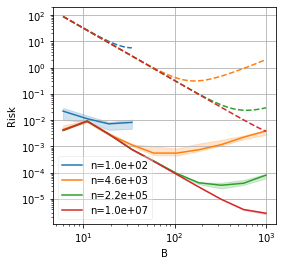

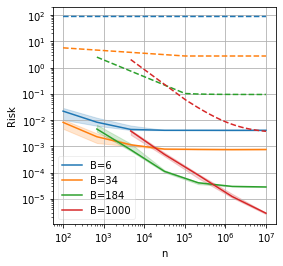

<Figure size 288x288 with 0 Axes>

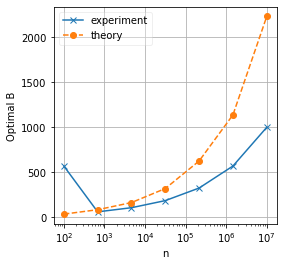

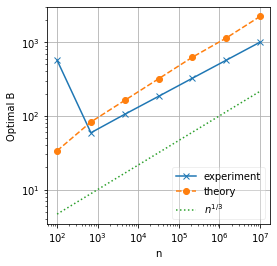

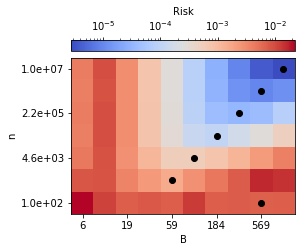

In [ ]:
for clf_name in np.unique(df['classifier']):
    print(clf_name)
    sim.plot_classifiers(df[df['classifier'] == clf_name], folder=clf_name)

#### Inspect different classfiers for one set of (n,B)

In [ ]:
import pandas as pd
from calibration import digitize
from simulation_calibration import evaluate_sample

n = 10000
B = 1000
i = 0

data = GaussianMixtureData2()
sim = CalibrationSimulation(data=data)
sim.run_classifiers_prepare()

x_cal, y_cal = sim.data.sample(n, 'xy')
x_test, y_test = sim.data.sample(10**7, 'xy')
results = []
calibrators = {}
for clf_name, clf in tqdm(sim.classifiers.items()):
    calibrator = HistogramCalibrator(n_bins=B, strategy='quantile')
    calibrator.fit(clf.predict_proba(x_cal.reshape(-1, 1))[:, 1], y_cal)
    calibrators[clf_name] = calibrator

    z_pred = clf.predict_proba(x_test.reshape(-1, 1))[:, 1]
    z_cali = calibrator.predict(z_pred)
    z_true = sim.data.py_given_x(x_test)
    bin_id = digitize(z_pred, calibrator.bins)
    metrics = evaluate_sample(z_cali, z_true, y=y_test, bin_id=bin_id)
    metrics.update({'n': n, 'B': B, 'i': i, 'classifier': clf_name})
    results.append(metrics)
pd.DataFrame(results)

  0%|          | 0/4 [00:00<?, ?it/s]

cal           sha      risk       ref        bs      n     B  i  \
0  0.007769  2.684011e-07  0.007769  0.077106  0.084839  10000  1000  0   
1  0.007769  2.684002e-07  0.007769  0.077106  0.084839  10000  1000  0   
2  0.000077  1.155734e-03  0.001233  0.077106  0.078329  10000  1000  0   
3  0.000588  1.320570e-04  0.000720  0.077106  0.077824  10000  1000  0   

          classifier  
0           Logistic  
1        Naive Bayes  
2      Decision Tree  
3  Gradient Boosting

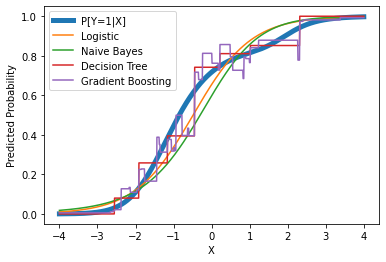

In [ ]:
xx = np.linspace(-4, 4, 1000)
plt.plot(xx, sim.data.py_given_x(xx), label='P[Y=1|X]', lw=5)
for clf_name, clf in sim.classifiers.items():
    plt.plot(xx, clf.predict_proba(xx.reshape(-1,1))[:,1], label=clf_name)
plt.xlabel('X')
plt.ylabel('Predicted Probability')
plt.legend()

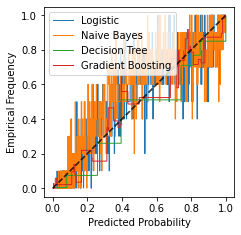

In [ ]:
for name, calibrator in calibrators.items():
    calibrator.plot(label=name, set_layout=True)
# OracleCalibrator(sim.data.py_given_z).plot()
plt.legend(loc='upper left')

In [ ]:
df.loc[(df['classifier'] == 'Logistic') & (df['n'] == 1000000) & (df['B'] == 100)] * 1000

cal       sha      risk        ref         bs           n       B  \
460  0.001972  0.096306  0.098269  16.998742  17.091883  1000000000  100000   
464  0.001613  0.093697  0.095301  17.194922  17.298132  1000000000  100000   
468  0.003244  0.093580  0.096815  17.188450  17.285415  1000000000  100000   
472  0.000873  0.094392  0.095256  17.280157  17.379038  1000000000  100000   
476  0.001204  0.094748  0.095942  17.194951  17.287398  1000000000  100000   

        i                                         classifier  
460     0  LogisticLogisticLogisticLogisticLogisticLogist...  
464  1000  LogisticLogisticLogisticLogisticLogisticLogist...  
468  2000  LogisticLogisticLogisticLogisticLogisticLogist...  
472  3000  LogisticLogisticLogisticLogisticLogisticLogist...  
476  4000  LogisticLogisticLogisticLogisticLogisticLogist...